In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/Bank data.csv')

In [80]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [81]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['y'] = label.fit_transform(df[['y']])

/home/suhas/master_dataklout/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [82]:
df.shape

(32950, 16)

In [83]:
df.duplicated().sum()

8

In [84]:
df = df.drop_duplicates(keep='first')

In [85]:
df.shape

(32942, 16)

In [86]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [87]:
X = df.drop(columns='y',axis=1)
y = df['y']

In [88]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent


In [89]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: y, dtype: int64

In [90]:
df.select_dtypes(exclude='number').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

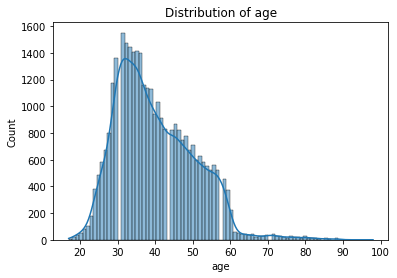

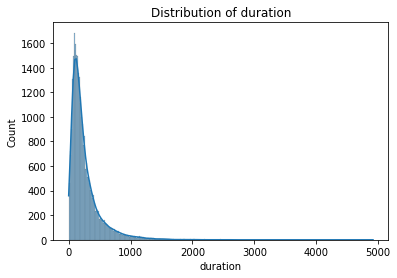

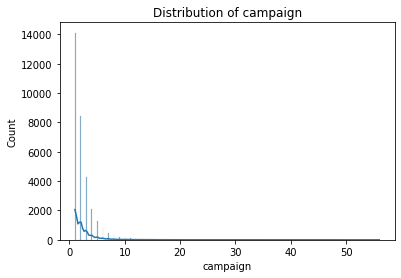

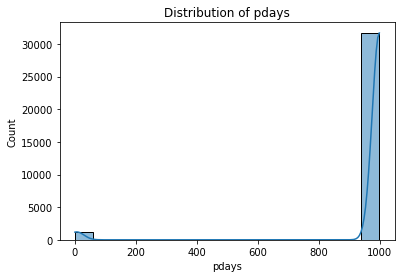

--------------------------------------------------


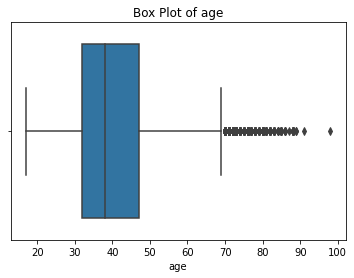

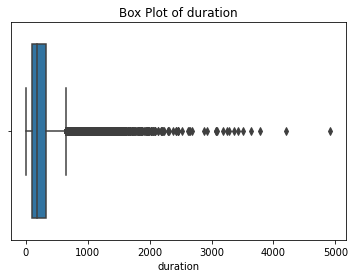

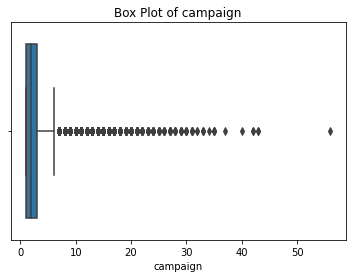

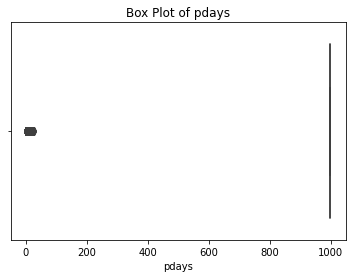

--------------------------------------------------


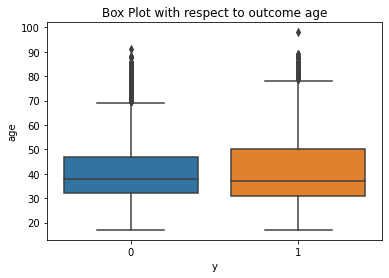

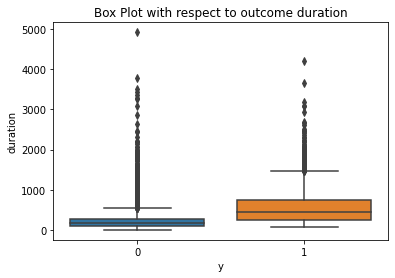

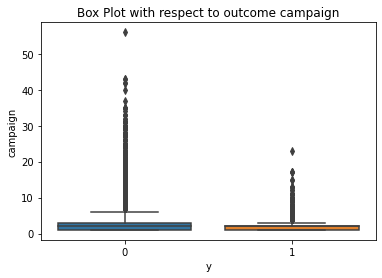

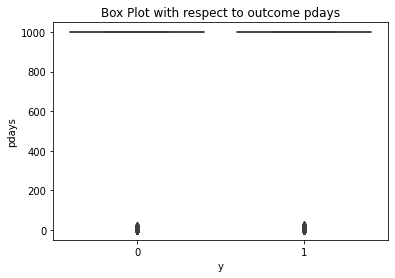

--------------------------------------------------
Categorical Columns


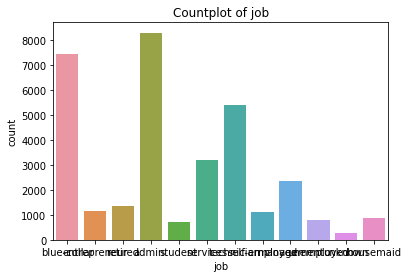

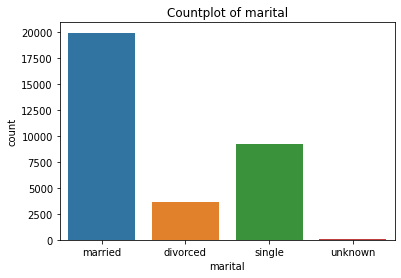

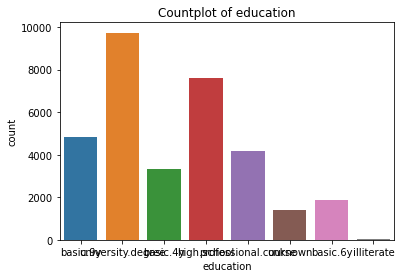

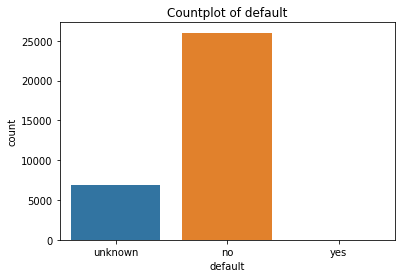

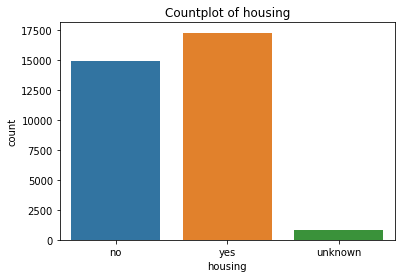

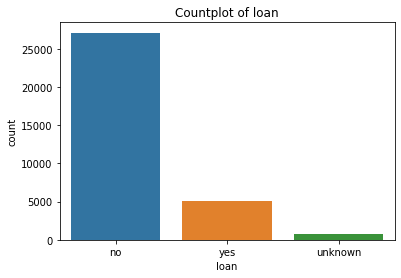

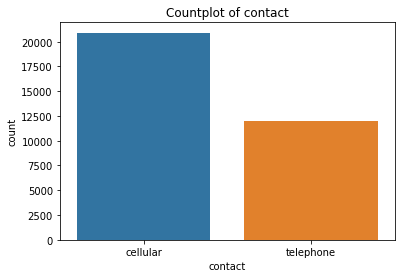

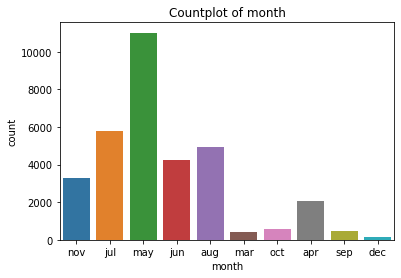

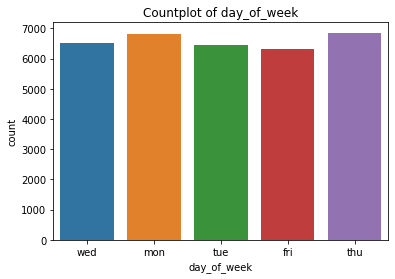

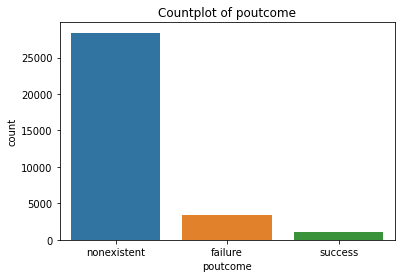

In [91]:
numerical_columns = ['age', 'duration', 'campaign', 'pdays']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome',]


#Basic EDA

for col in numerical_columns:
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

print('-'*50)

for col in numerical_columns:
    sns.boxplot(data=X,x=col)
    plt.title(f"Box Plot of {col}")
    plt.show()

print('-'*50)

for col in numerical_columns:
    sns.boxplot(x=df['y'],y=col,data=X)
    plt.title(f"Box Plot with respect to outcome {col}")
    plt.show()

print('-'*50)
print("Categorical Columns")

for col in categorical_columns:
    sns.countplot(data=X,x=col)
    plt.title(f"Countplot of {col}")
    plt.show()



In [92]:
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32942, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [95]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,0


In [96]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder


numerical_columns = ['age', 'duration', 'campaign', 'pdays']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome',]


num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(drop='first',sparse=False))
])

preprocess = ColumnTransformer([
    ('num',num_pipeline,numerical_columns),
    ('cat',cat_pipeline,categorical_columns)
])

In [97]:
preprocess_pipeline = Pipeline(
    steps= [
        ('pre_process',preprocess)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


algorithms = {
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'lr': LogisticRegression(),
    # 'lr': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
}

results = {}
pipeline_info = {}

for name,algo in algorithms.items():
    pipeline = Pipeline(
        steps= [
            ('preprocess',preprocess_pipeline),
            ('alog',algo)
        ]
    )

    pipeline.fit(X_train,y_train)

    joblib.dump(pipeline,f"{name}.pkl")
    pipeline_info[name] = pipeline

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(pipeline,X_train,y_train,scoring='accuracy',cv=5)
    cv_mean = cv_score.mean()
    

    results[name] = {
        "accuracy": accuracy,
        "cf_report": clf_report,
        "conf_matrix": conf_matrix,
        "cv_score": cv_score,
        "cv_mean": cv_mean
        
        }
    
    print(f"{name}")
    print(f"Accuracy:{accuracy}")
    print(f"Clf_report:\n{clf_report}")
    print(f"Cf_matrix:\n{conf_matrix}")
    print(f"Cv_score:{cv_score}")
    print(f"cv_mean:{cv_mean}")
    print('-'*50)






random_forest
Accuracy:0.9021095765670056
Clf_report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5815
           1       0.65      0.37      0.47       774

    accuracy                           0.90      6589
   macro avg       0.78      0.67      0.71      6589
weighted avg       0.89      0.90      0.89      6589

Cf_matrix:
[[5659  156]
 [ 489  285]]
Cv_score:[0.90571049 0.90324417 0.90590021 0.90777989 0.90360531]
cv_mean:0.905248013098055
--------------------------------------------------
decision_tree
Accuracy:0.8747913188647746
Clf_report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5815
           1       0.47      0.49      0.48       774

    accuracy                           0.87      6589
   macro avg       0.70      0.71      0.70      6589
weighted avg       0.88      0.87      0.88      6589

Cf_matrix:
[[5387  428]
 [ 397  377]]
Cv_score:[0.8742174

## To Get Features names in X_train

In [99]:
# # Fit the preprocessing pipeline
# preprocess_pipeline.fit(X_train)

# # Transform X_train using the preprocessing pipeline
# X_train_transformed = preprocess_pipeline.transform(X_train)

# # Access the ColumnTransformer object inside the pipeline
# column_transformer = preprocess_pipeline.named_steps['pre_process']

# # Extract feature names manually
# numeric_features = numerical_columns  # No changes to column names for numerical data
# categorical_features = column_transformer.transformers_[1][1].named_steps['encoder'].get_feature_names(categorical_columns)

# # Combine numerical and categorical feature names
# all_features = np.concatenate([numeric_features, categorical_features])

# # Create a DataFrame with transformed X_train and feature names
# X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_features)



In [100]:
# X_train_transformed_df